# Final Project Submission

Please fill out:
* Student name: Sarah Lowing
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL: https://wordpress.com/post/datamonsterdotblog.wordpress.com/47


## Overview
For this analysis we'll be using the King's County Sales dataset, which can be found in kc_house_data.csv.  Each record represents a house sale in the Seattle area for the year 2021-2022.  We will use this data to determine the fair market value of homes coming onto the market based on a table of comparable homes (comps).  This automation the process of generating lists of comps to aid real estate agents and their clients in navigating the complex pricing structures around home sales. This has real world value in making available an accurate statistical model, with a standard p-value of .05 to discern which variables are most likely to affect home prices and by how much.

### Business Understanding
Comps are used daily to determine the value of homes coming onto the market by buyer, sellers and real estate professionals. Providing a service to automate the process by which comps are generated has a value to these three groups. Real estate professionals have traditionally used MLS to to run comparative market analysis, which is not available to non-professionals.  Therefore, this information will be of additionally high value to home owners and buyers as a way to generate concrete and accurate ideas of pricing structures, and therefor what to expect for their own buying and selling experiences, as well as a general idea of which features of their homes might be worth improving before sale. 

### Data Understanding
After checking our data for missing or null values, we wil begin performing some simple statistical analysis to determine which variables have an existing and obvious correlation to our target variable, 'price'.  We'll examine the format of the data (numeric vs categorical, continuous vs discrete) to determine what, if any, transformations need to take place in order to perform  colinearity..  And finally we'll check for normality, and look to apply transformations (linear, logarythmic, polynomial regression or  to any data that does not conform to our L.I.N.E. acronym and is useful for our model and analysis. 

## Preliminary Data Analysis

In [1]:
# import neccessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

### Inspect and Clean Data

In [2]:
## Check the columns and first few rows
kc= pd.read_csv('Data/kc_house_data.csv')
len(kc)

30155

In [3]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [11]:
# Generate summary statistics
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


We can see some of our mean values here, as well as visually inspect for for any missing values or irregularities.  So far it looks good!

##### Checking for NaN

In [4]:
#checking for null values
kc.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [84]:
#Because of the small number of NaN values, we can drop null rows
kc.dropna(inplace=True)

##### Checking Location
So far everything looks good.  But it would be nice to have an additional column, "zip", that contains the zip code of each entry so that we can make sure our records are all actually located in King's County, as well as to group houses in neighborhoods for our model later on.

In [3]:
#extract zip codes.  We should have 224 different zipcodes -but there's an extra 176
kc['zip'] = kc['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')

In [86]:
# examine zip codes, kc county homes ahould start with 98 but we clearly have some that do not 
zip_counts= kc['zip'].value_counts()
zip_counts

98042    992
98038    857
98103    761
98115    760
98117    748
        ... 
76205      1
02645      1
56537      1
97006      1
85210      1
Name: zip, Length: 399, dtype: int64

In [ ]:
# closer look at address to double check that entries are erroneous, and not our code.  Clearly some bad data in here
df_bad_zips = kc[~kc['zip'].astype(str).str.startswith('98')]
print(df_bad_zips['address'])

In [ ]:
#Does the address have Seattle, Washington in it?  
df_bad_zips[df_bad_zips['address'].str.contains('Washington')]

In [4]:
# Doesn't look that way, so we'll drop the entries from the df in that are not from the Seattle area (df_bad_zips)
df_kc = kc[kc['zip'].astype(str).str.startswith('98')]
len(df_kc)

29241

In [21]:
#Check if we've got the right number of records 
bool(len(df_kc) + len(df_bad_zips)==len(kc))

True

#### Inspect Datatypes of Columns

In [12]:
#Visualize datatypes for future analysis
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29200 non-null  int64  
 1   date           29200 non-null  object 
 2   price          29200 non-null  float64
 3   bedrooms       29200 non-null  int64  
 4   bathrooms      29200 non-null  float64
 5   sqft_living    29200 non-null  int64  
 6   sqft_lot       29200 non-null  int64  
 7   floors         29200 non-null  float64
 8   waterfront     29200 non-null  object 
 9   greenbelt      29200 non-null  object 
 10  nuisance       29200 non-null  object 
 11  view           29200 non-null  object 
 12  condition      29200 non-null  object 
 13  grade          29200 non-null  object 
 14  heat_source    29200 non-null  object 
 15  sewer_system   29200 non-null  object 
 16  sqft_above     29200 non-null  int64  
 17  sqft_basement  29200 non-null  int64  
 18  sqft_g

We can see that the data has several different types. Some potentially relevant data for 'price' is categorical, like 'waterfront' and 'condition'.  We'll need to OHE these features if we'd like to add those variables to our model.
None of our numeric variables are categorical in nature, with the exception of 'id', 'lat' and 'long'.  While we won't need these for our statistical analysis, 'lat' and 'long' could come in handy later if we want to map home sales.  

The distributions of our variables does not appear normal, which alerts us that we will need to transform our data in order to progress with an effective model.  Let's view value counts of our kc dataframe to get a more concrete idea of how our categorical data is distributed

In [8]:
# Value counts for categorical data
categoricals = df_kc.select_dtypes("object")
categoricals=categoricals.drop(['date', 'address'], axis=1).copy()

In [18]:
for col in categoricals:
    print(df_kc[col].value_counts(), "\n")

NO     28692
YES      508
Name: waterfront, dtype: int64 

NO     28431
YES      769
Name: greenbelt, dtype: int64 

NO     24194
YES     5006
Name: nuisance, dtype: int64 

NONE         25676
AVERAGE       1892
GOOD           869
EXCELLENT      548
FAIR           215
Name: view, dtype: int64 

Average      17611
Good          8046
Very Good     3258
Fair           224
Poor            61
Name: condition, dtype: int64 

7 Average        11553
8 Good            8863
9 Better          3597
6 Low Average     2848
10 Very Good      1350
11 Excellent       402
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64 

Gas                  20168
Electricity           5959
Oil                   2899
Gas/Solar               93
Electricity/Solar       57
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64 

PUBLIC                24860
PRIVATE               

Examine values of columns we might use in our model for outliers

In [19]:
#nothing obviously kooky here to fix
df_kc['bathrooms'].describe()

count    29200.000000
mean         2.333168
std          0.894491
min          0.000000
25%          2.000000
50%          2.500000
75%          3.000000
max         10.500000
Name: bathrooms, dtype: float64

In [20]:
df_kc['sqft_living'].describe()

count    29200.000000
mean      2131.650753
std        976.713568
min          3.000000
25%       1440.000000
50%       1940.000000
75%       2640.000000
max      15360.000000
Name: sqft_living, dtype: float64

Looks like the 3 sqft is the only obviously wrong value, let's just fix that quickly

In [22]:
#identified record number for sqft_living == 3 and changed value to sqft from Redfin 
df_kc.at[14977, 'sqft_living']= 3325

In [21]:
df_kc['grade'].describe()

count         29200
unique           12
top       7 Average
freq          11553
Name: grade, dtype: object

We can see that sqft_living and sqft_above, bathrooms and sqft_living, as well as lat and long are all showing high colinearity.  That means that our final model should not contain any of these pairs.

## Preliminary Review of Numeric Variables

This is also a relatively long list of variables/columns.  We'll want to make sure that there's no co-liniarity between the variables in our final model, so we'll take a look at a correlation heatmap of our dataframe to identify possible trouble spots for our numeric variables.

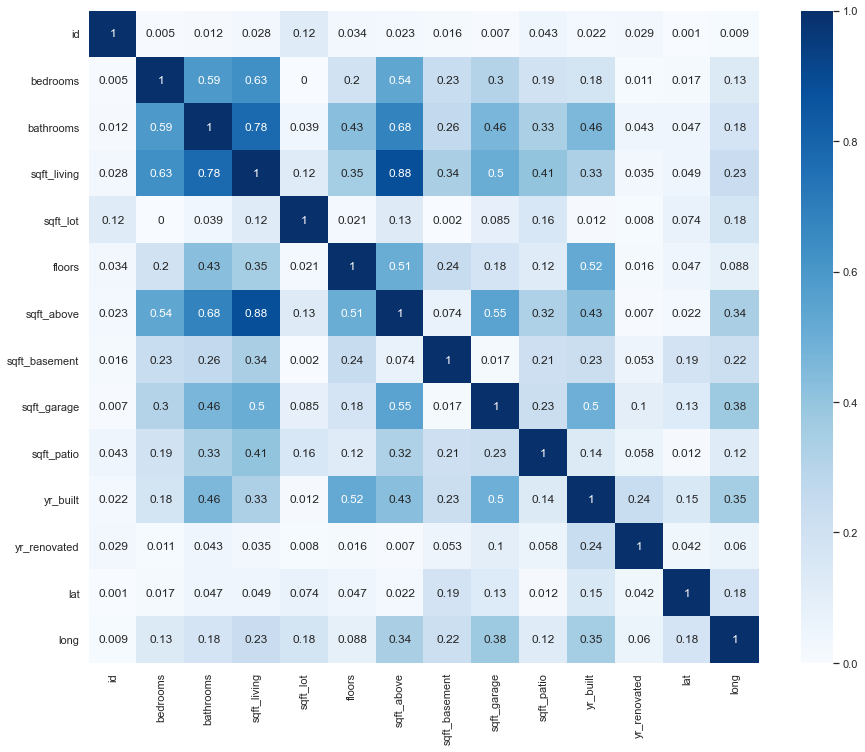

In [23]:
kc_colinearity = df_kc.drop(columns=['price'])
corr = round(abs(kc_colinearity.corr()),3)
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(corr, cmap="Blues", annot=True);

Our next step is to generate scatterplots to view the distributions of the continuous numeric variables that have the highest correlation to price and look for the visual markers of a linear relationship 

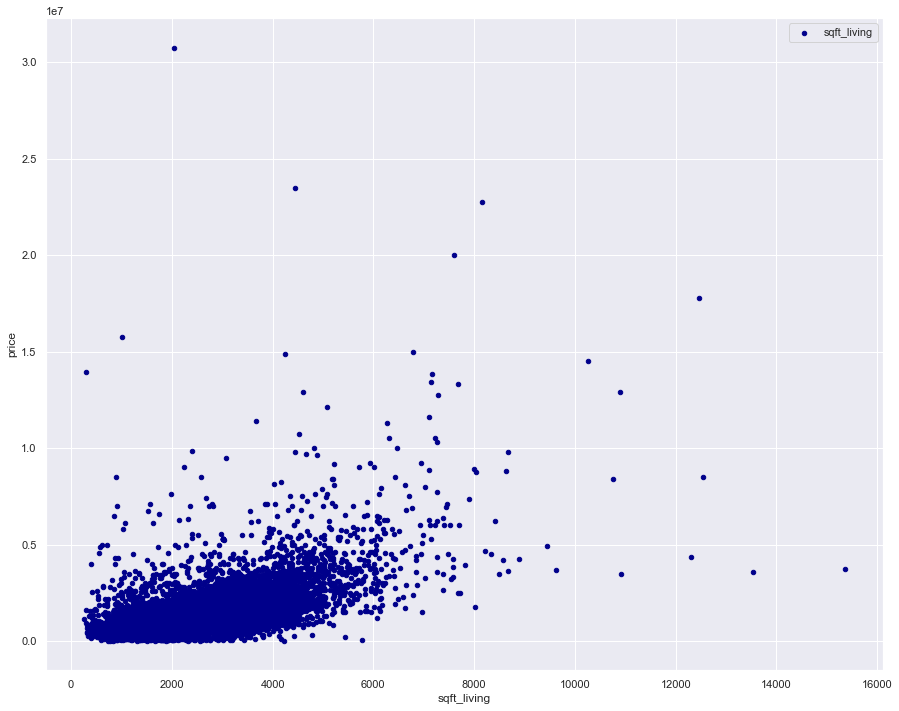

In [39]:
# Visualize relationships between sqft_living and price
ax= df_kc.plot.scatter(x="sqft_living", y="price", color="DarkBlue", label="sqft_living")


plt.ylabel('price');

In [5]:
# That's not looking great.  We'll build a model to fit a regression line and check the distribution
y=df_kc['price']
X=df_kc['sqft_living']

sgft_model = sm.OLS(y, sm.add_constant(X))
sqft_results = sgft_model.fit()

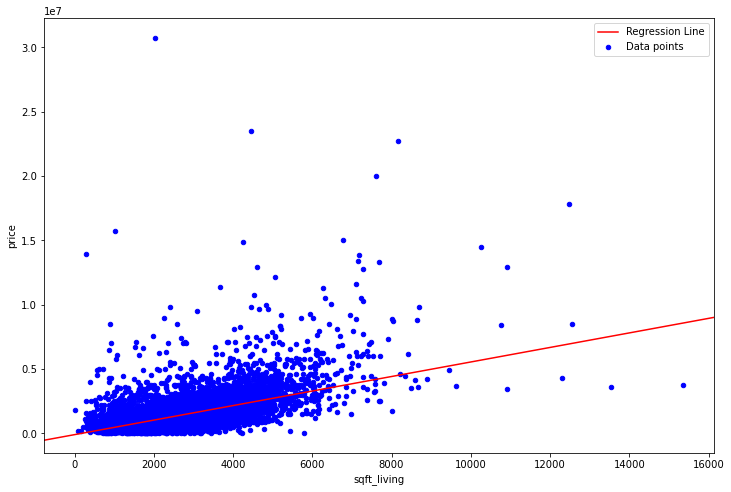

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
df_kc.plot.scatter(x="sqft_living", y="price", label="Data points", color='blue', ax=ax)
sm.graphics.abline_plot(model_results=sqft_results, label="Regression Line", color='red', ax=ax)
ax.legend();

In [57]:
#That's definitely not looking like a great linear relationship.  We'll test to see if it is linear.
linear_rainbow(sqft_results)

(1.115720052981009, 9.348873145408989e-12)

This confirms that sqft_living has a non-linear relationship with price, and we'll need to apply a non-linear transformation (log, interaction terms, exponential/polynomial)

### Analyze Plot of Numeric Nariables

There is a clear relationship between both sqft_living to price, but the values will need to be normed before we can use them in our model- the plots demonstrate that there is a non-linear relationshipp by their distributions , and we'll need to fix that by applying a transformation.

## Preliminary Review of Categorical Data
Let's begin by looking at some graphs of our categorical data to see what might be a good candidate for OHE transformation.  We'll use bargraphs to see if there's a linear relationship between price and our variables. We'll start with the column we created, 'zip'.

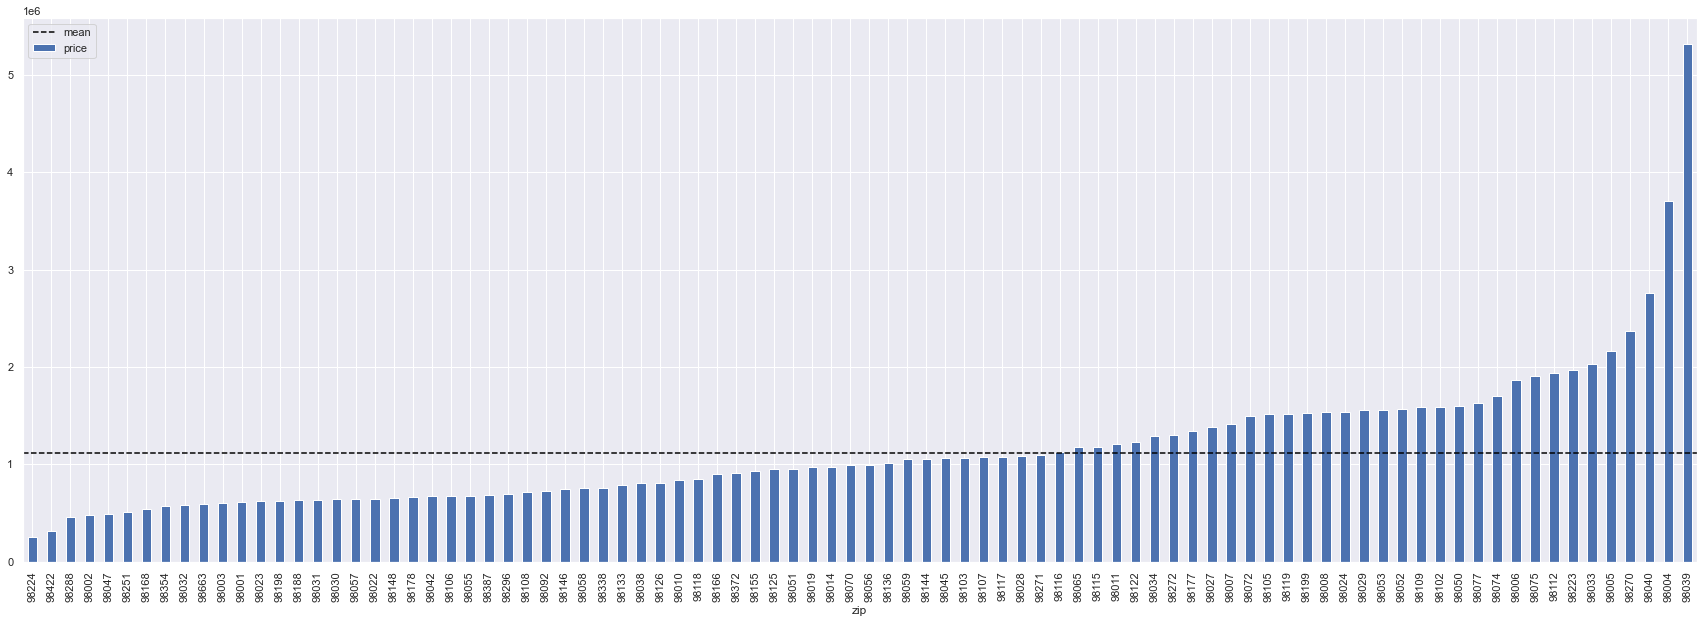

In [70]:
fig, ax = plt.subplots(figsize=(30,10))
df_kc.groupby("zip").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df_kc["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [ ]:
df_kc['zip'].value_counts

A very clear relationship between price and neighborhoods exists, moving forward it would be interesting to see this mapped out, with a mean price per neighborhood as a pop out on an interactive map.  At the very least, we now have a way of listing neighborhoods where mean house prices are below the mean house price for the Seattle area, which might be helpful for a thrifty homebuyer... 

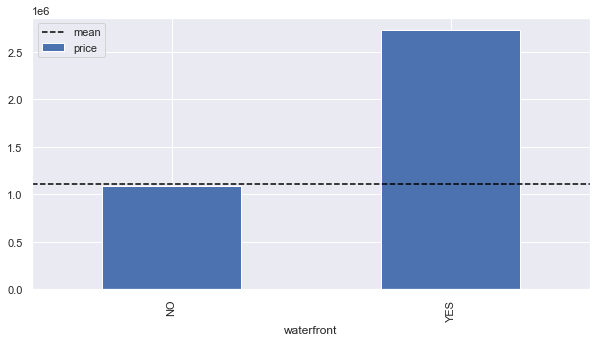

In [72]:
# Waterfront sns.barplot(data=df, x='waterfront', y='price')
fig, ax = plt.subplots(figsize=(10,5))
df_kc.groupby("waterfront").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df_kc["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

There's clearly a realtionship between "price" and waterfront views.  There's likely strong colinearity between "zips" and "waterfront_YES", so we should be careful about using both these variables in the same model.

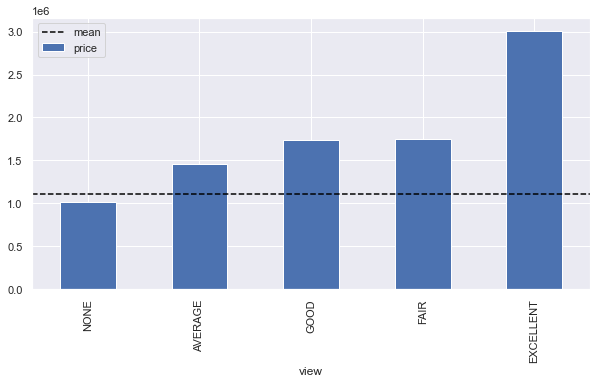

In [73]:
#view
fig, ax = plt.subplots(figsize=(10,5))
df_kc.groupby("view").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df_kc["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

Not looking great..."fair" and "good" look about equal, and there's a big uptick for "excellent".  It could be that"excellent" has a statistically significant relationship with "price" but with so many other cloumns to choose from, we just won't include this in our model.

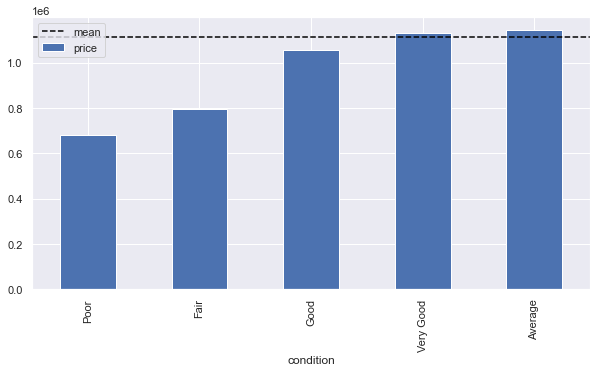

In [74]:
fig, ax = plt.subplots(figsize=(10,5))
df_kc.groupby("condition").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df_kc["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

We can see that there's not a linear relationship between condition and price if we examine the column names- average and very good have the same median price even though average falls two spots below very good when arranged by value. 

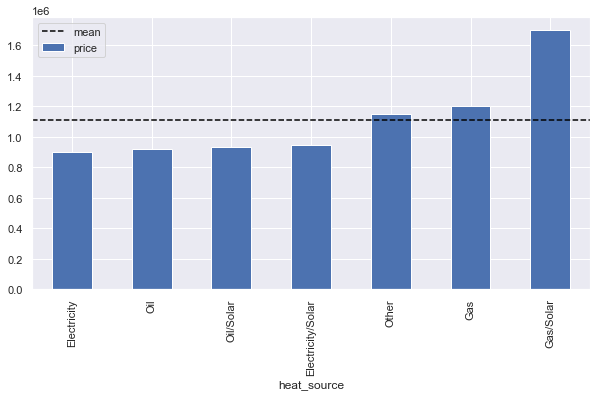

In [75]:
fig, ax = plt.subplots(figsize=(10,5))
df_kc.groupby("heat_source").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df_kc["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

I was curious if having solar power would add to the value of a house, but it looks like only houses that are equipped with gas and solar power experience an uptick in price compared to the median home price in Seattle.  However, it could be that other factors are at play.  Most large houses are unable to run exclusively on solar, and would need a backup for generating heat, hence the gas/solar mix.  There's also a statistically significant relationship between price and sqft so eco-freindly solar only smaller homes would be more likely to have smaller square footage, depressing their sales value. 

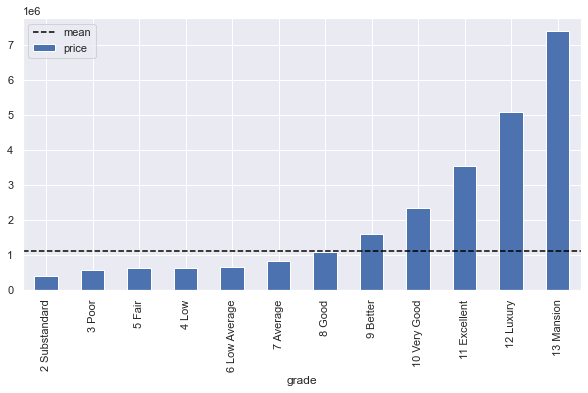

In [30]:

fig, ax = plt.subplots(figsize=(10,5))
df.groupby("grade").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

This looks very promising.  We can see that all the variables line are in order from least to greatest, both in terms of the median home value and the order of the "grade".  There is a slight bit of curvature, but the relationship looks mostly linear.

### Neighborhoods

In [9]:

import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap


In [ ]:
"""#Define coordinates of where we want to center our map
kc_coords = [47.6561, -122.005]

#Create the map
my_map = folium.Map(location = kc_coords, zoom_start = 13)

#Display the map
my_map

#look into geopandas but it gets complicated or plotly
"""

Lets try to get some neighborhood names attatched to those zip codes.  We'll use the 'zip_code_database' from https://www.unitedstateszipcodes.org/ to correlate our names to the zipcodes we extracted before.

In [ ]:
zips_= zips_kc[['zip', 'primary_city', 'state']]
zips_= zips_.where(zips_['state']=='WA')
zips_.dropna(inplace=True)


In [90]:
zips_= zips_kc[['zip', 'primary_city', 'state']]
zips_= zips_.where(zips_['state']=='WA')
zips_.dropna(inplace=True)

In [98]:
df_kc['neighborhood'].map(zips_.set_index('zip')['primary_city'])


565

In [ ]:
#df_kc['neighborhood'] = df_kc['zip'].apply(f)

### Analyze Plot of Categorical Variables

Of the categorical variables, waterfront, zip, and grade seem the most likely to have a statistically significant relationship with price.  We'll need to OHE these before including them in our model.

## Modeling

Let's begin by OHE all our categorical data, and making a model to see which of our variables is statistically significant by checking the p value

In [10]:
y_raw = df_kc["price"]
X_raw_cat = categoricals
X_raw_cat = pd.get_dummies(X_raw_cat)

X_raw_cat.drop(['waterfront_NO', 'greenbelt_NO',
               'nuisance_YES', 'grade_2 Substandard', 'condition_Poor',
               'heat_source_Electricity', 'sewer_system_PUBLIC', 'zip_98116'], 
               axis=1, inplace=True)


In [11]:
cat_model= sm.OLS(y_raw, sm.add_constant(X_raw_cat))
cat_results = cat_model.fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     437.5
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:16:40   Log-Likelihood:            -4.2717e+05
No. Observations:               29241   AIC:                         8.546e+05
Df Residuals:                   29120   BIC:                         8.556e+05
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.087e+15      2e+16      0.054      0.957   -3.82e+16    4.04e+16
waterfront_YES                    7.33e+05    2.9e+04     25.264      0.000    6.76e+05     7.9e+05
greenbelt_YES                    7761.5081   2.06e+04      0.378      0.706   -3.25e+04     4.8e+04
nuisance_NO                       4.69e+04   8623.935      5.438      0.000       3e+04    6.38e+04
view_AVERAGE                    -1.087e+15      2e+16     -0.054      0.957   -4.04e+16    3.82e+16
view_EXCELLENT                  -1.087e+15      2e+16     -0.054      0.957   -4.04e+16    3.82e+16
view_FAIR                       -1.087e+15      2e+16     -0.054      0.957   -4.04e+16    3.82e+16
view_GOOD                       -1.087e+15      2e+16     -0.054      0.957   -4.04e+16    3.82e+16
view_NONE                       -1.087e+15      2e+16     -0.054      0.957   -4.04e+16    3.82e+16
condition_Average                1.915e+04   7.02e+04      0.273      0.785   -1.18e+05    1.57e+05
condition_Fair                  -1.231e+05   7.78e+04     -1.581      0.114   -2.76e+05    2.95e+04
condition_Good                   6.284e+04   7.03e+04      0.894      0.371    -7.5e+04    2.01e+05
condition_Very Good              1.396e+05   7.07e+04      1.974      0.048     977.387    2.78e+05
grade_1 Cabin                    5.124e+05   5.38e+05      0.953      0.341   -5.42e+05    1.57e+06
grade_10 Very Good               1.602e+06   3.82e+05      4.192      0.000    8.53e+05    2.35e+06
grade_11 Excellent               2.499e+06   3.83e+05      6.526      0.000    1.75e+06    3.25e+06
grade_12 Luxury                  3.741e+06   3.85e+05      9.711      0.000    2.99e+06     4.5e+06
grade_13 Mansion                 6.248e+06   3.97e+05     15.719      0.000    5.47e+06    7.03e+06
grade_3 Poor                     3.915e+05   4.09e+05      0.958      0.338   -4.09e+05    1.19e+06
grade_4 Low                       3.58e+05   3.89e+05      0.921      0.357   -4.04e+05    1.12e+06
grade_5 Fair                     4.398e+05   3.83e+05      1.150      0.250    -3.1e+05    1.19e+06
grade_6 Low Average              5.144e+05   3.82e+05      1.347      0.178   -2.34e+05    1.26e+06
grade_7 Average                  5.994e+05   3.82e+05      1.570      0.117   -1.49e+05    1.35e+06
grade_8 Good                     7.879e+05   3.82e+05      2.063      0.039    3.93e+04    1.54e+06
grade_9 Better                   1.156e+06   3.82e+05      3.025      0.002    4.07e+05     1.9e+06
heat_source_Electricity/Solar   -2.169e+04   7.17e+04     -0.303      0.762   -1.62e+05    1.19e+05
heat_source_Gas                  6.948e+04   8498.915      8.175      0.000    5.28e+04    8.61e+04
heat_source_Gas/Solar            2.927e+05   5.63e+04      5.203      0.000    1.82

As expected, with the high number of variables in this model our r-squared value is pretty high for a multiple linear regression model.  There's going to be some collinearity between our variables, like "waterfront_yes" and "zip".  Many of our variables are statistically significant, with a significant coefficient value as well.  As expected we see see variables like 'zip', 'waterfront_YES', and high 'grade' values make a big difference in 'price'.  Because we dropped the zip code in our model that was closest to the mean price, we can say that for and 'zip' we could add or subtract the coefficient value to find the gain or loss from the mean value of a house 

#### Shifting our Model to Improve Intercept Interpretability
So far our models have been unchanged by any kind of linear or logarithmic transformations.  We'll take time now to: 

* zero centering some of our variables to make more interpretable predictions of the mean value of a house with stated features.

* Log transform irregular distributions in "sqft_living" to normalize distribution

If the model is correctly specified, then we should not see curvature in the residuals


### 1st Model: Baseline

In [18]:
y_raw = df_kc["price"]
X_raw = df_kc[['sqft_living', 'waterfront', 'zip']]
X_raw = pd.get_dummies(X_raw, columns=["waterfront", 'zip'],)
X_raw.drop(['waterfront_NO', 'zip_98116'], axis=1, inplace=True)
#drop zip codes for this model

In [19]:
baseline_model = sm.OLS(y_raw, sm.add_constant(X_raw))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     548.6
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:31:14   Log-Likelihood:            -4.2785e+05
No. Observations:               29241   AIC:                         8.559e+05
Df Residuals:                   29151   BIC:                         8.566e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.654e+05   2.87e+04      9.260      0.000    2.09e+05    3.22e+05
sqft_living      451.9811      3.644    124.040      0.000     444.839     459.123
waterfront_YES  1.316e+06   2.49e+04     52.796      0.000    1.27e+06    1.37e+06
zip_98001      -5.977e+05   3.55e+04    -16.853      0.000   -6.67e+05   -5.28e+05
zip_98002      -5.059e+05      4e+04    -12.639      0.000   -5.84e+05   -4.27e+05
zip_98003      -5.479e+05   3.82e+04    -14.357      0.000   -6.23e+05   -4.73e+05
zip_98004       1.809e+06   4.17e+04     43.344      0.000    1.73e+06    1.89e+06
zip_98005       6.069e+05   4.96e+04     12.241      0.000     5.1e+05    7.04e+05
zip_98006       2.812e+05   3.69e+04      7.627      0.000    2.09e+05    3.53e+05
zip_98007       1.491e+05   5.22e+04      2.855      0.004    4.67e+04    2.51e+05
zip_98008       2.337e+05   3.92e+04      5.967      0.000    1.57e+05     3.1e+05
zip_98010      -6.874e+05   4.17e+04    -16.492      0.000   -7.69e+05   -6.06e+05
zip_98011      -1.397e+05   4.39e+04     -3.185      0.001   -2.26e+05   -5.37e+04
zip_98014       -3.91e+05   5.18e+04     -7.553      0.000   -4.93e+05    -2.9e+05
zip_98019      -3.528e+05   4.47e+04     -7.891      0.000    -4.4e+05   -2.65e+05
zip_98022      -5.086e+05   3.78e+04    -13.452      0.000   -5.83e+05   -4.35e+05
zip_98023      -6.082e+05   3.48e+04    -17.502      0.000   -6.76e+05    -5.4e+05
zip_98024       4.216e+04   5.85e+04      0.721      0.471   -7.24e+04    1.57e+05
zip_98027      -6.409e+04   3.96e+04     -1.619      0.106   -1.42e+05    1.35e+04
zip_98028      -2.216e+05   4.05e+04     -5.475      0.000   -3.01e+05   -1.42e+05
zip_98029       1.351e+05   4.14e+04      3.260      0.001    5.39e+04    2.16e+05
zip_98030      -5.559e+05   3.97e+04    -14.018      0.000   -6.34e+05   -4.78e+05
zip_98031      -5.354e+05   3.66e+04    -14.616      0.000   -6.07e+05   -4.64e+05
zip_98032      -5.326e+05   4.91e+04    -10.850      0.000   -6.29e+05   -4.36e+05
zip_98033        6.11e+05   3.57e+04     17.111      0.000    5.41e+05    6.81e+05
zip_98034       5.875e+04   3.48e+04      1.689      0.091   -9446.495    1.27e+05
zip_98038      -5.035e+05   3.36e+04    -15.000      0.000   -5.69e+05   -4.38e+05
zip_98039       3.224e+06   7.69e+04     41.900      0.000    3.07e+06    3.37e+06
zip_98040       8.956e+05   4.08e+04     21.947      0.000    8.16e+05    9.76e+05
zip_98042      -5.696e+05   3.28e+04    -17.343      0.000   -6.34e+05   -5.05e+05
zip_98045      -3.762e+05   3.77e+04     -9.985      0.000    -4.5e+05   -3.02e+05
zip_98047      -5.023e+05    6.8e+04     -7.382      0.000   -6.36e+05   -3.69e+05
zip_98050       7.405e+04   3.89e+05      0.191      0.849   -6.88e+05    8.36e+05
zip_98051      -4.701e+05   7.26e+04     -6.478      0.000   -6.12e+05   -3.28e+05
zip_98052   

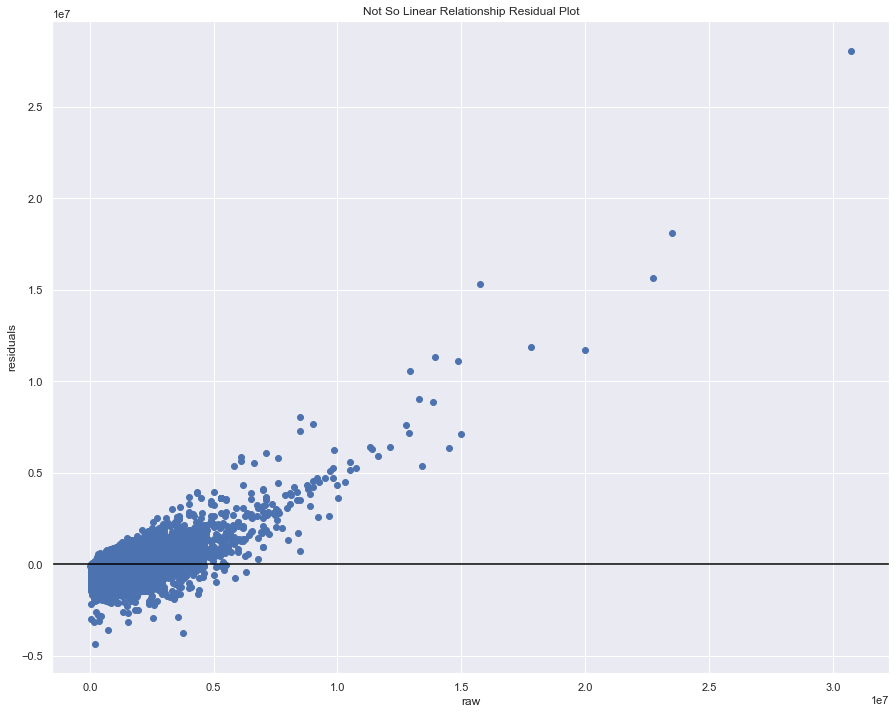

In [94]:
# Analyze coefficiants and p values here
fig, ax = plt.subplots()

ax.scatter(y, baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("raw")
ax.set_ylabel("residuals")
ax.set_title("Not So Linear Relationship Residual Plot");

In [83]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(baseline_results)

(1.2971791167271212, 1.1755804738567849e-55)

### 2nd Model: Centering Data

For this model we'll center our data to get a more meaningful intercept.

In [26]:
X_centered = X_raw.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
    
X_centered.describe()

,sqft_living,waterfront_YES,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,zip_98271,zip_98272,zip_98288,zip_98296,zip_98338,zip_98354,zip_98372,zip_98387,zip_98422,zip_98663
count,2.924100e+04,2.924100e+04,2.924100e+04,2.924100e+04,2.924100e+04,2.924100e+04,2.924100e+04,2.924100e+04,2.924100e+04,2.924100e+04,...,2.924100e+04,2.924100e+04,2.924100e+04,2.924100e+04,2.924100e+04,2.924100e+04,29241.000000,2.924100e+04,2.924100e+04,2.924100e+04
mean,1.492963e-15,2.050273e-18,1.123854e-18,3.037442e-20,5.801514e-18,3.842364e-18,-9.112326e-19,6.166007e-18,1.245351e-18,-3.644930e-19,...,1.898401e-20,-2.847602e-20,2.904554e-19,2.278082e-20,3.796803e-21,-6.834245e-20,0.000000,3.796803e-21,2.278082e-20,7.593605e-21
std,9.773450e+02,1.316649e-01,1.444039e-01,1.108771e-01,1.218795e-01,1.043602e-01,7.821801e-02,1.329115e-01,7.238108e-02,1.157279e-01,...,1.307553e-02,1.432328e-02,2.548279e-02,5.847953e-03,8.270113e-03,2.803525e-02,0.008270,8.270113e-03,5.847953e-03,8.270113e-03
min,-2.127757e+03,-1.764646e-02,-2.130570e-02,-1.244827e-02,-1.508156e-02,-1.101194e-02,-6.155740e-03,-1.798844e-02,-5.266578e-03,-1.357683e-02,...,-1.709928e-04,-2.051913e-04,-6.497726e-04,-3.419856e-05,-6.839711e-05,-7.865668e-04,-0.000068,-6.839711e-05,-3.419856e-05,-6.839711e-05
25%,-6.907566e+02,-1.764646e-02,-2.130570e-02,-1.244827e-02,-1.508156e-02,-1.101194e-02,-6.155740e-03,-1.798844e-02,-5.266578e-03,-1.357683e-02,...,-1.709928e-04,-2.051913e-04,-6.497726e-04,-3.419856e-05,-6.839711e-05,-7.865668e-04,-0.000068,-6.839711e-05,-3.419856e-05,-6.839711e-05
50%,-1.907566e+02,-1.764646e-02,-2.130570e-02,-1.244827e-02,-1.508156e-02,-1.101194e-02,-6.155740e-03,-1.798844e-02,-5.266578e-03,-1.357683e-02,...,-1.709928e-04,-2.051913e-04,-6.497726e-04,-3.419856e-05,-6.839711e-05,-7.865668e-04,-0.000068,-6.839711e-05,-3.419856e-05,-6.839711e-05
75%,5.092434e+02,-1.764646e-02,-2.130570e-02,-1.244827e-02,-1.508156e-02,-1.101194e-02,-6.155740e-03,-1.798844e-02,-5.266578e-03,-1.357683e-02,...,-1.709928e-04,-2.051913e-04,-6.497726e-04,-3.419856e-05,-6.839711e-05,-7.865668e-04,-0.000068,-6.839711e-05,-3.419856e-05,-6.839711e-05
max,1.322924e+04,9.823535e-01,9.786943e-01,9.875517e-01,9.849184e-01,9.889881e-01,9.938443e-01,9.820116e-01,9.947334e-01,9.864232e-01,...,9.998290e-01,9.997948e-01,9.993502e-01,9.999658e-01,9.999316e-01,9.992134e-01,0.999932,9.999316e-01,9.999658e-01,9.999316e-01


In [27]:
X_2_model = sm.OLS(y_raw, sm.add_constant(X_centered))
X_2_results = X_2_model.fit()
X_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     548.6
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:46:09   Log-Likelihood:            -4.2785e+05
No. Observations:               29241   AIC:                         8.559e+05
Df Residuals:                   29151   BIC:                         8.566e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.113e+06   3206.182    347.023      0.000    1.11e+06    1.12e+06
sqft_living      451.9811      3.644    124.040      0.000     444.839     459.123
waterfront_YES  1.316e+06   2.49e+04     52.796      0.000    1.27e+06    1.37e+06
zip_98001      -5.977e+05   3.55e+04    -16.853      0.000   -6.67e+05   -5.28e+05
zip_98002      -5.059e+05      4e+04    -12.639      0.000   -5.84e+05   -4.27e+05
zip_98003      -5.479e+05   3.82e+04    -14.357      0.000   -6.23e+05   -4.73e+05
zip_98004       1.809e+06   4.17e+04     43.344      0.000    1.73e+06    1.89e+06
zip_98005       6.069e+05   4.96e+04     12.241      0.000     5.1e+05    7.04e+05
zip_98006       2.812e+05   3.69e+04      7.627      0.000    2.09e+05    3.53e+05
zip_98007       1.491e+05   5.22e+04      2.855      0.004    4.67e+04    2.51e+05
zip_98008       2.337e+05   3.92e+04      5.967      0.000    1.57e+05     3.1e+05
zip_98010      -6.874e+05   4.17e+04    -16.492      0.000   -7.69e+05   -6.06e+05
zip_98011      -1.397e+05   4.39e+04     -3.185      0.001   -2.26e+05   -5.37e+04
zip_98014       -3.91e+05   5.18e+04     -7.553      0.000   -4.93e+05    -2.9e+05
zip_98019      -3.528e+05   4.47e+04     -7.891      0.000    -4.4e+05   -2.65e+05
zip_98022      -5.086e+05   3.78e+04    -13.452      0.000   -5.83e+05   -4.35e+05
zip_98023      -6.082e+05   3.48e+04    -17.502      0.000   -6.76e+05    -5.4e+05
zip_98024       4.216e+04   5.85e+04      0.721      0.471   -7.24e+04    1.57e+05
zip_98027      -6.409e+04   3.96e+04     -1.619      0.106   -1.42e+05    1.35e+04
zip_98028      -2.216e+05   4.05e+04     -5.475      0.000   -3.01e+05   -1.42e+05
zip_98029       1.351e+05   4.14e+04      3.260      0.001    5.39e+04    2.16e+05
zip_98030      -5.559e+05   3.97e+04    -14.018      0.000   -6.34e+05   -4.78e+05
zip_98031      -5.354e+05   3.66e+04    -14.616      0.000   -6.07e+05   -4.64e+05
zip_98032      -5.326e+05   4.91e+04    -10.850      0.000   -6.29e+05   -4.36e+05
zip_98033        6.11e+05   3.57e+04     17.111      0.000    5.41e+05    6.81e+05
zip_98034       5.875e+04   3.48e+04      1.689      0.091   -9446.495    1.27e+05
zip_98038      -5.035e+05   3.36e+04    -15.000      0.000   -5.69e+05   -4.38e+05
zip_98039       3.224e+06   7.69e+04     41.900      0.000    3.07e+06    3.37e+06
zip_98040       8.956e+05   4.08e+04     21.947      0.000    8.16e+05    9.76e+05
zip_98042      -5.696e+05   3.28e+04    -17.343      0.000   -6.34e+05   -5.05e+05
zip_98045      -3.762e+05   3.77e+04     -9.985      0.000    -4.5e+05   -3.02e+05
zip_98047      -5.023e+05    6.8e+04     -7.382      0.000   -6.36e+05   -3.69e+05
zip_98050       7.405e+04   3.89e+05      0.191      0.849   -6.88e+05    8.36e+05
zip_98051      -4.701e+05   7.26e+04     -6.478      0.000   -6.12e+05   -3.28e+05
zip_98052   

Ok!  This makes our coefficiants much more interpretable.  Our intercept is now 1,112,620, or the mean price of a house in all of King County.  We can now say that houses with waterfront views are an average of 1,316,339 dollars more than that.  Additionally, we can see which neighborhoods will yeild housing prices above or below our mean much more easily.  For instance, let's look at the coefficient values of our two neighborhoods with the largest increases and decreases in price, Medina and Skykomish, we can see that average prices for two neighborhoods will be 3,224,000 above our intercept and 689,300 less than our intercept respectively.  


### 3rd Model: Log Transform sqft_living

In [47]:
X_sqft_log = X_raw.copy()

X_sqft_log["log(sqft_living)"] = np.log(X_sqft_log["sqft_living"])


In [48]:
X_sqft_log.drop('sqft_living', axis=1, inplace=True)

y_log = y_raw
X_log_model = sm.OLS(y_log, sm.add_constant(X_sqft_log))
X_log_results = X_log_model.fit()
X_log_results

### 4th Model: Scaling

In [102]:
#. DELETE THIS SECTION 
X_scaled = (X_raw - np.mean(X_raw)) / np.std(X_raw)


In [103]:
X_scaled.describe()


,sqft_living,waterfront_YES,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,zip_98271,zip_98272,zip_98288,zip_98296,zip_98338,zip_98354,zip_98372,zip_98387,zip_98422,zip_98663
count,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04,...,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04,2.920000e+04
mean,-6.472752e-17,1.946692e-17,4.063720e-17,-1.435686e-17,1.387018e-17,1.800690e-17,1.314017e-17,-5.061400e-17,-3.163375e-17,-1.679022e-17,...,8.516779e-18,2.433366e-18,5.231736e-18,-4.866731e-18,-3.893385e-18,-1.849358e-17,-4.380058e-18,-1.216683e-18,-4.623395e-18,-1.946692e-18
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.916530e+00,-1.330612e-01,-1.476508e-01,-1.121962e-01,-1.236892e-01,-1.055952e-01,-7.831525e-02,-1.354406e-01,-7.281439e-02,-1.174022e-01,...,-1.308672e-02,-1.433603e-02,-2.341465e-02,-5.852158e-03,-8.276342e-03,-2.807654e-02,-8.276342e-03,-5.852158e-03,-5.852158e-03,-8.276342e-03
25%,-7.083089e-01,-1.330612e-01,-1.476508e-01,-1.121962e-01,-1.236892e-01,-1.055952e-01,-7.831525e-02,-1.354406e-01,-7.281439e-02,-1.174022e-01,...,-1.308672e-02,-1.433603e-02,-2.341465e-02,-5.852158e-03,-8.276342e-03,-2.807654e-02,-8.276342e-03,-5.852158e-03,-5.852158e-03,-8.276342e-03
50%,-1.963508e-01,-1.330612e-01,-1.476508e-01,-1.121962e-01,-1.236892e-01,-1.055952e-01,-7.831525e-02,-1.354406e-01,-7.281439e-02,-1.174022e-01,...,-1.308672e-02,-1.433603e-02,-2.341465e-02,-5.852158e-03,-8.276342e-03,-2.807654e-02,-8.276342e-03,-5.852158e-03,-5.852158e-03,-8.276342e-03
75%,5.203906e-01,-1.330612e-01,-1.476508e-01,-1.121962e-01,-1.236892e-01,-1.055952e-01,-7.831525e-02,-1.354406e-01,-7.281439e-02,-1.174022e-01,...,-1.308672e-02,-1.433603e-02,-2.341465e-02,-5.852158e-03,-8.276342e-03,-2.807654e-02,-8.276342e-03,-5.852158e-03,-5.852158e-03,-8.276342e-03
max,1.354461e+01,7.515339e+00,6.772738e+00,8.912955e+00,8.084778e+00,9.470123e+00,1.276891e+01,7.383313e+00,1.373355e+01,8.517725e+00,...,7.641335e+01,6.975433e+01,4.270831e+01,1.708771e+02,1.208263e+02,3.561692e+01,1.208263e+02,1.708771e+02,1.708771e+02,1.208263e+02


In [104]:
predictors = sm.add_constant(X_scaled)
model = sm.OLS(y_raw, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     549.4
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:35:18   Log-Likelihood:            -4.2723e+05
No. Observations:               29200   AIC:                         8.546e+05
Df Residuals:                   29110   BIC:                         8.554e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.113e+06   3206.092    347.155      0.000    1.11e+06    1.12e+06
sqft_living     4.418e+05   3562.268    124.015      0.000    4.35e+05    4.49e+05
waterfront_YES  1.744e+05   3281.349     53.137      0.000    1.68e+05    1.81e+05
zip_98001      -8.642e+04   5124.719    -16.863      0.000   -9.65e+04   -7.64e+04
zip_98002      -5.604e+04   4437.597    -12.629      0.000   -6.47e+04   -4.73e+04
zip_98003       -6.66e+04   4651.389    -14.318      0.000   -7.57e+04   -5.75e+04
zip_98004       1.887e+05   4357.017     43.314      0.000     1.8e+05    1.97e+05
zip_98005        4.63e+04   3872.713     11.955      0.000    3.87e+04    5.39e+04
zip_98006       3.732e+04   4903.538      7.610      0.000    2.77e+04    4.69e+04
zip_98007        1.08e+04   3781.678      2.855      0.004    3383.275    1.82e+04
zip_98008       2.698e+04   4534.538      5.951      0.000    1.81e+04    3.59e+04
zip_98010      -7.067e+04   4301.787    -16.429      0.000   -7.91e+04   -6.22e+04
zip_98011      -1.361e+04   4133.407     -3.292      0.001   -2.17e+04   -5503.710
zip_98014      -2.888e+04   3790.063     -7.619      0.000   -3.63e+04   -2.14e+04
zip_98019      -3.308e+04   4082.590     -8.102      0.000   -4.11e+04   -2.51e+04
zip_98022      -6.291e+04   4697.577    -13.393      0.000   -7.21e+04   -5.37e+04
zip_98023      -9.278e+04   5297.882    -17.513      0.000   -1.03e+05   -8.24e+04
zip_98024       2542.3553   3644.700      0.698      0.485   -4601.422    9686.132
zip_98027      -7330.0001   4498.757     -1.629      0.103   -1.61e+04    1487.768
zip_98028      -2.411e+04   4397.613     -5.481      0.000   -3.27e+04   -1.55e+04
zip_98029       1.407e+04   4320.527      3.256      0.001    5600.164    2.25e+04
zip_98030      -6.275e+04   4476.231    -14.019      0.000   -7.15e+04    -5.4e+04
zip_98031      -7.148e+04   4890.514    -14.617      0.000   -8.11e+04   -6.19e+04
zip_98032      -4.219e+04   3882.970    -10.867      0.000   -4.98e+04   -3.46e+04
zip_98033       8.719e+04   5098.587     17.101      0.000    7.72e+04    9.72e+04
zip_98034       8773.1088   5284.046      1.660      0.097   -1583.861    1.91e+04
zip_98038       -8.53e+04   5667.736    -15.049      0.000   -9.64e+04   -7.42e+04
zip_98039       1.446e+05   3452.818     41.889      0.000    1.38e+05    1.51e+05
zip_98040       9.713e+04   4434.004     21.905      0.000    8.84e+04    1.06e+05
zip_98042      -1.032e+05   5950.698    -17.345      0.000   -1.15e+05   -9.16e+04
zip_98045      -4.611e+04   4729.687     -9.749      0.000   -5.54e+04   -3.68e+04
zip_98047       -2.56e+04   3506.333     -7.301      0.000   -3.25e+04   -1.87e+04
zip_98050        610.5848   3214.374      0.190      0.849   -5689.734    6910.904
zip_98051      -2.224e+04   3466.349     -6.416      0.000    -2.9e+04   -1.54e+04
zip_98052   

## Step 5: Calculate an Error-Based Metric


### Checking L.I.N.E.

* Linear relationship between the response variable (y) and predictor (x)

* Data is independent: 1. Data avoids collinearity (features can't be used to predict each other)  2.  Data is not autocorrelated (correlated with itself)

* Model residuals are normally distributed

* Homoscedasticity- data has an equal variance

Per Assumptions for Linear Regression: "Looking at the residuals is the single best way to flag potential violations of linear regression assumptions and figure out what to do about them."


## Regression Results

## Recommendations

## Next Steps

In [ ]:
price75= df['price'].quantile(0.75)

# make a dataframe with the quantile
expensive = df[(df['price'] >= price75)]
expensive.head()

# make a dataframe with the quantile
expensive = df[(df['price'] >= price75)]
expensive.head()

In [ ]:
#to check column names after OHE
"""
df['column_name'].value_counts()
"""

# Seaborne regplot to visualize original data with regression line 

"""
(need to use after making model with OLS)
sns.regplot(x="sqft_living", y="price", data=df);
"""

# checking for linearity in residuals
"""linear_model = sm.OLS(y, sm.add_constant(X))
linear_results = linear_model.fit()

fig, ax = plt.subplots()

ax.scatter(y, linear_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");"""

# To make a model
"""

data = pd.read_csv("auto-mpg.csv")
y_raw = data["mpg"]
X_raw = data[["weight", "model year"]]
X_raw

baseline_model = sm.OLS(y_raw, sm.add_constant(X_raw))
baseline_results = baseline_model.fit()
print(baseline_results.summary())
"""

# to transform values log

"""
X_weight_log = X_raw.copy()

X_weight_log["log(weight)"] = np.log(X_weight_log["weight"])

# Visually inspect raw vs. transformed values
X_weight_log[["weight", "log(weight)"]]

"""
# Plot distributions of raw vs. transformed values
# (scales are so different that it's not reasonable to share an x-axis)
"""
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(X_weight_log["weight"])
ax1.set_xlabel("weight")
ax2.hist(X_weight_log["log(weight)"], color="orange")
ax2.set_xlabel("log(weight)");
"""

# compare original to log
"""
weight_log_model = sm.OLS(y_raw, sm.add_constant(X_weight_log))
weight_log_results = weight_log_model.fit()

print(f"""
Baseline model adjusted R-Squared:    {baseline_results.rsquared_adj}
log(weight) model adjusted R-Squared: {weight_log_results.rsquared_adj}
""")

"""

Text(0.5, 0, 'log(sqft_living)')

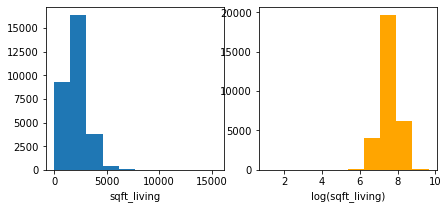

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(X_sqft_log["sqft_living"])
ax1.set_xlabel("sqft_living")
ax2.hist(X_sqft_log["log(sqft_living)"], color="orange")
ax2.set_xlabel("log(sqft_living)")